In [3]:
import numpy as np
from matplotlib import pyplot as plt
import random as rd
from scipy.stats import uniform
import sklearn 

In [ ]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits.images.shape)
print(digits.keys())
print(digits.images[0])
print(digits.data[0])

print(np.shape(digits.data[0]))

SyntaxError: invalid syntax (3013743278.py, line 7)

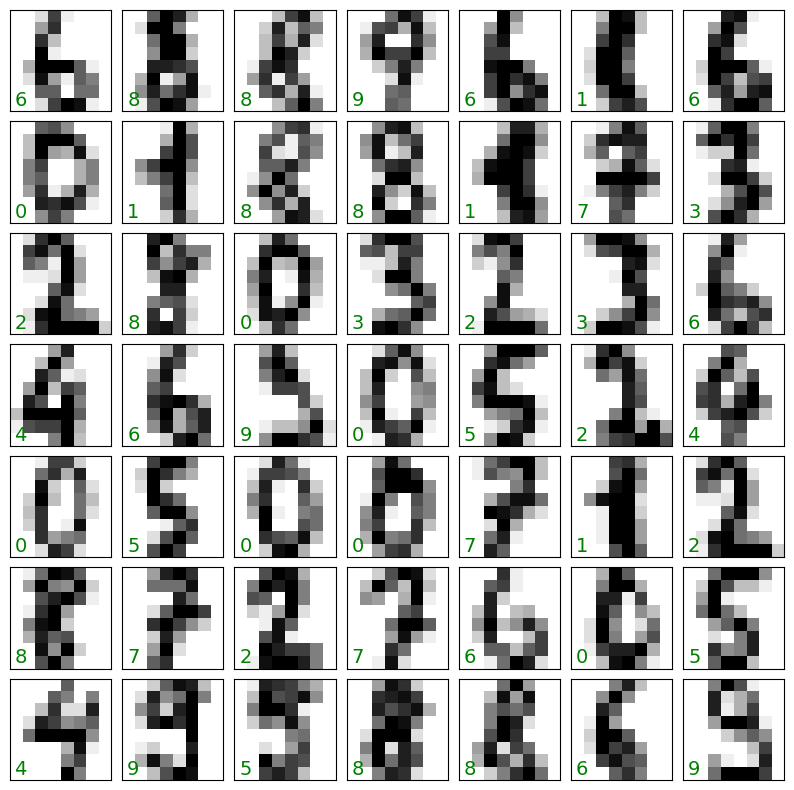

In [7]:
fig, axes = plt.subplots(7,7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(15)
mychoices = np.random.choice(digits.images.shape[0],100)

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

In [ ]:
from sklearn.manifold import Isomap
embedding = Isomap (n_neighbors=10, n_components= 2)  #TRY DIFFERENT VALUES FOR n_neighbors 
X_transformed = embedding.fit_transform(digits.data)


(1797, 2)


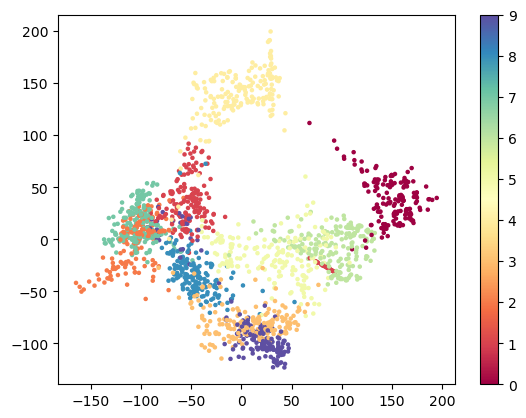

In [30]:
print(X_transformed.shape)
plt.scatter(X_transformed[:,0], X_transformed[:,1], c=digits.target, cmap='Spectral', s=5)
plt.colorbar()

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state = 13)
classifier = LogisticRegression(solver='sag', max_iter=1000)
classifier.fit(X_train, y_train)
print('Success rate =',classifier.score(X_test, y_test))


Success rate = 0.9472222222222222


In [42]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[30  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  1  0  0  1  0  1]
 [ 0  2 36  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  1  2]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  1  0 43  0  0  0  1]
 [ 0  1  0  0  0  0 41  0  0  0]
 [ 0  0  0  0  0  1  0 24  0  1]
 [ 0  3  0  0  1  0  0  0 28  2]
 [ 0  0  0  0  0  0  0  0  0 33]]


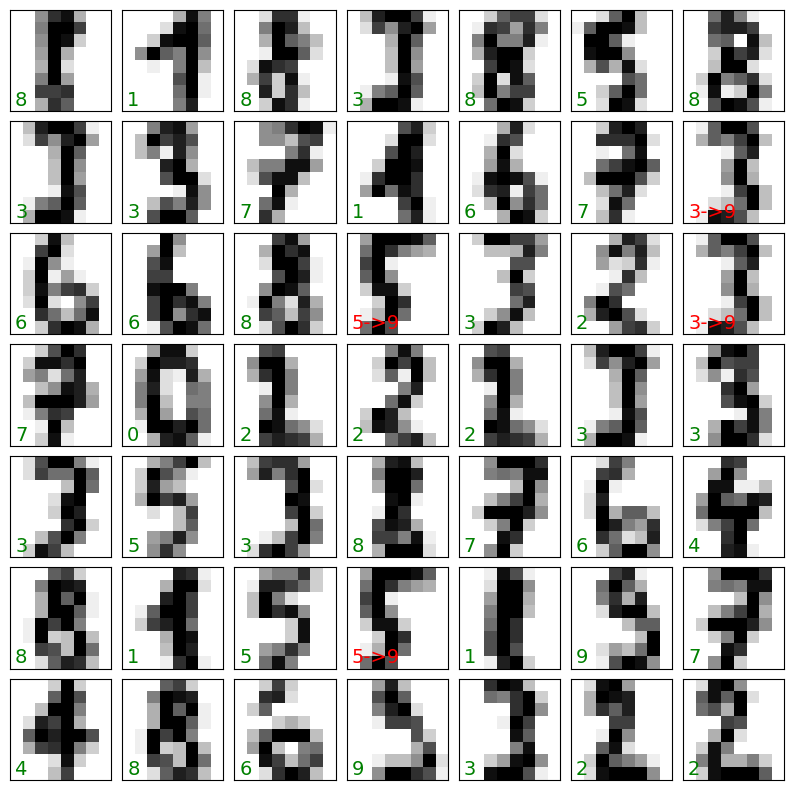

In [43]:
mychoices = np.random.choice(y_test.shape[0],50)

fig2, axes2 = plt.subplots(7,7, figsize=(10, 10))
fig2.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes2.flat):
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')
    if y_test[mychoices[i]] == y_pred[mychoices[i]]:
        ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    else:
        ax.text(0.05, 0.05, str(digits.target[mychoices[i]]) + '->' + str(y_pred[mychoices[i]]),transform=ax.transAxes, color='red', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])